# **2023-2 비지니스머신러닝이론및실습**

Takehome exam (due date : 12월 21일까지)

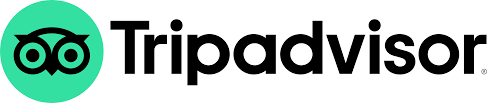

첨부된 파일은 로마시내의 호텔 목록이다. Tripadvisor를 통해 투숙객이 부여할 평점을 예측해 보시오. 또한 결과를 분석하여 나름의 business insight를 도출해 보시오.
- 결과의 재현을 위해 random_state는 123으로 고정한다.
- 각 feature의 사용 유무/feature engineering은 적절히 판단한다.
- test 데이터는 전체 데이터의 20%를 사용하여 평가한다.
- 아래 코드는 가이드 코드이므로 제출할 때에는 계산된 결과보다 정확한 결과가 도출되도록 노력한다.

이 과제는 Takehome exam이므로 **혼자서 프로젝트를 진행해야 한다**.
(아는 사람과 공유하면 그것 때문에 본인의 성적이 떨어질 수 있다.)

## Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/HUFS 23-2/Business Machine Learning/data

/content/drive/MyDrive/HUFS 23-2/Business Machine Learning/data


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('final_project_hotelReview.csv',encoding='CP949')
data.head()

,Unnamed: 0,hotel_url,name,bubble_rating,category_hotel,category_inn,category_specialty,class,n_reviews,location_grade,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
0,1,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,4.5,0,1,0,3,154,100.0,...,0,0,0,0,0,0,0,1,1,0
1,2,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,5.0,1,0,0,4,8286,100.0,...,1,1,0,0,0,0,0,1,0,0
2,3,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,4.5,1,0,0,4,4389,51.0,...,0,0,0,0,0,0,0,1,0,0
3,4,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,4.5,1,0,0,4,4987,100.0,...,1,1,0,0,0,0,0,1,1,0
4,5,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,4.5,1,0,0,3,1068,100.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(data.shape)

(4599, 267)


In [ ]:
data.drop(['Unnamed: 0', 'hotel_url', 'name'], axis=1, inplace=True)

In [ ]:
# 호텔 등급 없는 것들은 모두 0으로 변환
idx = data['class'] == 'no stars'
data.loc[idx, 'class'] = 0

# missing value 포함한 feature 정보 출력
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i, data[i].isnull().sum())

location_grade 218
price_curr_min 2224
price_min 1125
price_max 1127
photos 577


## pycaret

In [ ]:
! pip install pycaret

In [ ]:
from pycaret.regression import *

In [ ]:
reg=setup(data,target='bubble_rating',train_size=0.8)

,Description,Value
0,Session id,3981
1,Target,bubble_rating
2,Target type,Regression
3,Original data shape,"(4599, 264)"
4,Transformed data shape,"(4599, 269)"
5,Transformed train set shape,"(3679, 269)"
6,Transformed test set shape,"(920, 269)"
7,Numeric features,262
8,Categorical features,1
9,Rows with missing values,50.8%


In [ ]:
best=compare_models(sort='rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.5277,0.5347,0.7291,0.2546,0.1752,0.1767,1.2180
lightgbm,Light Gradient Boosting Machine,0.5352,0.5557,0.7432,0.2252,0.1770,0.1775,2.4230
br,Bayesian Ridge,0.5515,0.5663,0.7507,0.2092,0.1800,0.1848,0.1630
omp,Orthogonal Matching Pursuit,0.5546,0.5725,0.7549,0.2006,0.1806,0.1854,0.1080
rf,Random Forest Regressor,0.5460,0.5780,0.7578,0.1945,0.1811,0.1810,3.0940
ridge,Ridge Regression,0.5657,0.5843,0.7626,0.1837,0.1815,0.1873,0.1510
xgboost,Extreme Gradient Boosting,0.5605,0.6159,0.7818,0.1430,0.1852,0.1845,0.5080
ada,AdaBoost Regressor,0.6224,0.6450,0.8019,0.0943,0.1847,0.1909,0.2700
et,Extra Trees Regressor,0.5964,0.6873,0.8263,0.0404,0.1956,0.1937,3.7940
en,Elastic Net,0.6337,0.7012,0.8357,0.0202,0.1979,0.2131,0.1640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]